## Week 4: BBC News Classification

# Table of Contents
* [1. Introduction](#1)
    * [1.1 Business Case](#1.1)
    * [1.2 Problem Statement](#1.2)
    * [1.3 Objectives](#1.3)
    * [1.4 GitHub Repository Link](#1.4)
* [2. Imports and configurations](#2)
* [3. Data Processing](#3)
    * [3.1 Data Loading](#3.1)
    * [3.2 Data Cleaning and Preprocessing](#3.2)
        * [3.2.1 Data Cleaning Conclusion](#3.2.1)
* [4. Exploratory Data Analysis (EDA)](#4)
* [5. Modeling](#5)
    * [5.1 Modeling Strategy](#5.1)
    * [5.2 Modeling](#5.2)
        * [5.2.1 Singular Value Decomposition (SVD)](#5.2.1)
        * [5.2.2 Non-Negative Matrix Factorization (NMF)](#5.2.2)
        * [5.2.3 Latent Semantic Analysis (LSA)](#5.2.3)
    * [5.3 Modeling, Evaluation and Comparison](#5.3)
        * [5.3.1 Best Model](#5.3.1)
        * [5.3.2 Sample Solution DataFrame](#5.3.2)
        * [5.3.3 Comparision of Best Model with Random Forest Classifier (Supervised Model)](#5.3.3)

## 1. Introduction <a class="anchor" id="1"></a>
### 1.1. Business Case <a class="anchor" id="1.1"></a>

In the digital age, news organizations like the BBC produce a vast amount of content daily. With the proliferation of news articles, it becomes increasingly important to manage and categorize this information efficiently. An automated news classification system can provide several significant benefits:

1. **Efficiency:** Manual categorization of news articles is time-consuming and labor-intensive. Automation can significantly reduce the workload for editors and journalists.
2. **Consistency:** Automated systems can provide consistent categorization, minimizing human errors and subjective biases that may arise in manual classification.
3. **Search and Retrieval:** Well-categorized news articles improve the efficiency of search and retrieval systems, enabling readers to find relevant content quickly.
4. **Personalization:** It allows for the creation of personalized news feeds based on user preferences, enhancing user engagement and satisfaction.
5. **Analytics and Insights:** Categorized data can be used to analyze trends, readership interests, and the performance of different news categories over time.

### 1.2 Problem Statement <a class="anchor" id="1.2"></a>

**The objective is to build a matrix factorization machine learning model capable of accurately classifying BBC news articles into five categories: business, entertainment, politics, sport, and tech using various types of matrix factorization techniques.** The dataset comprises 2225 articles, divided into 1490 for training and 735 for testing. The goal is to develop a system that can learn from the training data and correctly categorize previously unseen news articles from the test set, and beyond.

### 1.3 Objectives <a class="anchor" id="1.3"></a>

To achieve the overarching goal above, the project has set the following key objectives: 

1. **Data Collection and Preprocessing:**
 - Load the BBC news dataset locally (https://www.kaggle.com/competitions/learn-ai-bbc/data). 
 - Clean and preprocess the data to handle missing values, irrelevant features, and text normalization.
 - Transform the text data into a suitable format for model input using TF-IDF matrix.
 
 
2. **Exploratory Data Analysis (EDA):**
 - Perform exploratory data analysis to understand the distribution and relationships between the categories and the text data.
 - Visualize data using charts and graphs to identify trends and patterns within the news articles.
 - Identify and select the most relevant features for modeling based on their significance in the text data.
 
 
3. **Model Development:**
 - Develop multiple classification models using various matrix factorization techniques:
     - Singular Value Decomposition (SVD): Reduce the dimensionality of the text data and capture latent semantic structures.
     - Non-Negative Matrix Factorization (NMF): Decompose the document-term matrix into interpretable components.
     - Latent Semantic Analysis (LSA): Use SVD to transform the text data into a lower-dimensional space for improved classification.
 - Train each model using the processed dataset and tune hyperparameters for optimal performance.
 
 
4. **Modeling, Evaluation and Comparison:**
 - Evaluate the performance of each model using the accuracy metric.
 - Compare the models based on their accuracy and select the best-performing model for classifying BBC news articles.
 - Generate a sample solution file containing ArticleId and the predicted Category for the test dataset.
 
 
5. **Model Interpretation and Insights:**
 - Interpret the results of the best-performing model to understand the underlying factors contributing to the classification of news articles.
 - Compare the best performing model with a supervised learning model, specifically @@@@@@@@

By completing these objectives, the project will provide a robust and efficient solution for categorizing BBC news articles, thereby enhancing the BBC's content management, searchability, and user experience.

### 1.4 GitHub Repository Link  <a class="anchor" id="1.4"></a>

https://github.com/binyammesfin/DTSA-5510

### 2. Imports and configurations <a class="anchor" id="2"></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import string

from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from nltk.corpus import stopwords
import nltk

In [83]:
# Column and Row Global Config 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib Global Configurations
plt.rcParams['figure.figsize'] = [12, 8]                  # Set global plot size
plt.rcParams['font.size'] = 14                            # Set global font size
plt.rcParams['lines.linewidth'] = 2                       # Set global line width
plt.style.use('seaborn-darkgrid')                         # Set global style
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])  # Set global colors
plt.rcParams['axes.grid'] = True                          # Set global grid
plt.rcParams['xtick.labelsize'] = 12                      # Set global x-tick label size
plt.rcParams['ytick.labelsize'] = 12                      # Set global y-tick label size
plt.rcParams['axes.labelsize'] = 14                       # Set global axes label size
plt.rcParams['axes.titlesize'] = 16                       # Set global axes title size

# Seaborn Global Configurations
sns.set_style('whitegrid')                                # Set global style
sns.set_context('notebook', font_scale=1.5)               # Set global context and font scale
sns.set_palette('deep')                                   # Set global color palette
sns.set(rc={'figure.figsize':(12, 8)})                    # Set global figure size
sns.set_context(rc={"font.size":14, "axes.titlesize":16, "axes.labelsize":14})  # Set global font sizes

# Optionally, combine settings with a theme
sns.set_theme(style='darkgrid', palette='muted', rc={"figure.figsize": (12, 8)})

# Others
warnings.filterwarnings("ignore")

## 3. Data Processing <a class="anchor" id="3"></a>
### 3.1 Data Loading <a class="anchor" id="3.1"></a>

The BBC news dataset is a comprehensive collection of news articles labeled under five categories: business, entertainment, politics, sport, and tech. This dataset provides a valuable resource for developing and testing machine learning models for text classification.

**Data Source:**
The dataset is available at  : https://www.kaggle.com/competitions/learn-ai-bbc/data

**Data Collection:**
The data comprises 2225 news articles gathered from the BBC, each labeled under one of five categories. The dataset has been pre-split into training and testing sets, with 1490 records for training and 735 for testing.

**Data Description:**
- Size:
    - The dataset consists of 2225 rows and 3 columns: ArticleId, Text, and Category.
- Content:
    - **ArticleId:** A unique identifier for each article.
    - **Text:** The content of the article.
    - **Category:** The label for the article (business, entertainment, politics, sport, or tech).

In [84]:
# Data Loading
def load_data(file_path):
    return pd.read_csv(file_path)

# Assuming the dataset files are named 'BBC News Train.csv' and 'BBC News Test.csv'
train_file_path = './learn-ai-bbc/BBC News Train.csv'
test_file_path = './learn-ai-bbc/BBC News Test.csv'

# Load the datasets
bbc_train = load_data(train_file_path)
bbc_test = load_data(test_file_path)

In [85]:
bbc_train.sample(5, random_state=42)

,ArticleId,Text,Category
941,2160,wal-mart is sued over rude lyrics the parents ...,entertainment
297,1360,howard taunts blair over splits tony blair s f...,politics
271,302,fox attacks blair s tory lies tony blair lie...,politics
774,864,online commons to spark debate online communit...,tech
420,2184,piero gives rugby perspective bbc sport unveil...,tech


### 3.2 Data Cleaning and Preprocessing <a class="anchor" id="3.2"></a>

The following code performs the following preprocessing steps:

- **Drop irrelevant features:** In this case, we assume there are no irrelevant features to drop.
- **Handle missing values:** Any rows with missing values are removed.
- **Text normalization:** The text is converted to lowercase, numbers are removed, punctuation is stripped, and extra whitespace is removed.

In [86]:
# Ensure you have the stopwords downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the data
def preprocess_data(df, max_word_count=600):
    # Drop irrelevant features (if any), in this case, we don't have irrelevant features
    # Handling missing values
    df.dropna(inplace=True)

    # Text normalization
    def normalize_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stop words
        text = ' '.join([word for word in text.split() if word not in stop_words])
        # Remove whitespace
        text = text.strip()
        return text

    # Apply text normalization
    df['Text'] = df['Text'].apply(normalize_text)
    
    # Cap word counts to max_word_count, this will handle ouliners with more than 600 word count
    df['Text'] = df['Text'].apply(lambda x: ' '.join(x.split()[:max_word_count]))
    
    return df

# Clean and preprocess the training dataset
bbc_train_cleaned = preprocess_data(bbc_train)
# Clean and preprocess the testing dataset
bbc_test_cleaned = preprocess_data(bbc_test)

# Display the first few rows of the cleaned training dataset
print("Cleaned Training Dataset and Shape:")
print(bbc_train_cleaned.head())
print(bbc_train_cleaned.shape)

# Display the first few rows of the cleaned testing dataset
print("Cleaned Testing Dataset and Shape:")
print(bbc_test_cleaned.head())
print(bbc_test_cleaned.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Binyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned Training Dataset and Shape:
   ArticleId                                               Text  Category
0       1833  worldcom exboss launches defence lawyers defen...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens maj...  business
3       1976  lifestyle governs mobile choice faster better ...      tech
4        917  enron bosses payout eighteen former enron dire...  business
(1490, 3)
Cleaned Testing Dataset and Shape:
   ArticleId                                               Text
0       1018  qpr keeper day heads preston queens park range...
1       1319  software watching work software monitor every ...
2       1138  arcy injury adds ireland woe gordon arcy ruled...
3        459  india reliance family feud heats ongoing publi...
4       1020  boro suffer morrison injury blow middlesbrough...
(735, 2)


### 3.3 Transform the text data <a class="anchor" id="3.3"></a>

- **TfidfVectorizer:** This is used to convert a collection of raw documents to a matrix of TF-IDF features. (**Due to computational requirement, the number of features was limited for this project at 1000**)
- **fit_transform:** Fits the vectorizer on the training data and transforms the training data into a TF-IDF matrix.
- **transform:** Transforms the test data using the same vectorizer fitted on the training data.
- **DataFrames:** The transformed data is converted into pandas DataFrames for easier handling and inspection.

In [93]:
# Function to transform text data using TF-IDF
def transform_text_data(train_df, test_df, max_features=1000):
    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', max_features=1000)
    
    # Fit the vectorizer on the training data and transform both training and testing data
    X_train = vectorizer.fit_transform(train_df['Text'])
    X_test = vectorizer.transform(test_df['Text'])
    
    # Convert the transformed data into DataFrames for easier handling
    X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
    X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
    
    return X_train_df, X_test_df, vectorizer

# Transform the text data
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = transform_text_data(bbc_train_cleaned, bbc_test_cleaned)

In [94]:
# Display the first few rows of the transformed training dataset, same can be done for testing dataset.
X_train_tfidf.head(3)

,ability,able,academy,access,according,account,accused,across,act,action,actor,actress,added,adding,admitted,africa,age,agency,ago,agreed,agreement,ahead,aid,air,airline,alan,album,allow,allowed,almost,along,already,also,although,always,america,american,among,amount,analyst,analysts,andy,announced,annual,another,answer,anything,appeal,apple,april,area,areas,argued,around,arsenal,asia,ask,asked,association,asylum,attack,attacks,attempt,audience,august,australia,australian,authorities,available,average,aviator,award,awards,away,back,bad,ball,ban,band,bank,bankruptcy,banks,based,battle,bbc,beat,became,become,becoming,began,behind,believe,believed,believes,best,better,bid,big,biggest,bill,billion,bit,black,blair,bn,board,body,book,boost,boss,bought,box,break,bring,britain,british,broadband,brought,brown,bt,budget,building,bush,business,businesses,buy,call,called,calls,came,camera,campaign,campbell,cannot,car,card,cards,care,career,case,cases,cash,central,centre,ceremony,chairman,challenge,champion,champions,chance,chancellor,change,changes,charge,charges,charles,chart,chelsea,chief,children,china,chinese,choice,christmas,city,civil,claim,claimed,claims,clear,close,club,coach,code,come,comedy,comes,coming,comments,commission,committee,commons,community,companies,company,compared,competition,computer,computers,concerned,concerns,conference,confidence,confirmed,conservative,conservatives,consumer,consumers,content,continue,continued,contract,control,cost,costs,could,council,countries,country,couple,course,court,create,created,credit,crime,criminal,criticised,critics,cup,current,currently,customers,cut,cuts,data,date,david,davis,day,days,de,deal,death,debate,debt,debut,december,decided,decision,defeat,defence,deficit,demand,democrats,dems,denied,department,designed,despite,details,development,device,devices,different,difficult,digital,director,disaster,dollar,done,double,download,dr,drama,drive,dropped,drugs,due,dvd,earlier,early,east,easy,economic,economy,education,effort,eight,either,election,elections,email,end,energy,england,enough,ensure,entertainment,especially,eu,euro,europe,european,euros,even,event,ever,every,everyone,everything,evidence,example,exchange,executive,expected,experience,exports,extra,face,facing,fact,failed,fall,family,fans,far,february,feel,fell,felt,ferguson,festival,field,fight,figure,figures,files,film,films,final,finance,financial,find,firm,firms,first,five,focus,following,football,force,forced,foreign,form,former,forward,found,four,fourth,france,fraud,free,french,friday,front,full,fund,future,gadget,gadgets,game,games,gaming,gave,general,generation,german,germany,get,getting,giant,give,given,giving,global,go,goal,going,gold,golden,gone,good,google,gordon,got,government,grand,great,group,groups,growing,growth,guilty,half,happy,hard,head,health,held,help,helped,high,higher,history,hit,hold,hollywood,home,hope,hopes,host,hours,house,howard,however,huge,human,id,idea,illegal,images,immigration,impact,important,include,included,includes,including,income,increase,increased,independent,india,indian,industry,information,injury,insisted,instead,interest,international,internet,investment,investors,involved,iraq,ireland,irish,issue,issues,italy,james,january,japan,job,jobs,john,johnson,jones,june,keen,keep,kelly,kennedy,key,king,know,known,labour,large,largest,last,late,later,latest,launch,launched,law,laws,lead,leader,leaders,leading,league,least,leave,led,left,legal,less,let,level,levels,lib,liberal,life,like,likely,line,list,little,live,liverpool,lives,local,london,long,longer,look,looked,looking,looks,lord,lords,lost,lot,love,low,lower,mac,machine,machines,made,madrid,magazine,main,major,majority,make,makes,making,man,management,manager,manchester,many,march,mark,market,markets,martin,match,may,mean,means,meanwhile,media,meet,meeting,member,members,men,message,messages,met,michael,microsoft,might,mike,million,mini,minister,ministers,minute,minutes,missed,mobile,mobiles,moment,monday,money,month,months,move,moved,

## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="4"></a>

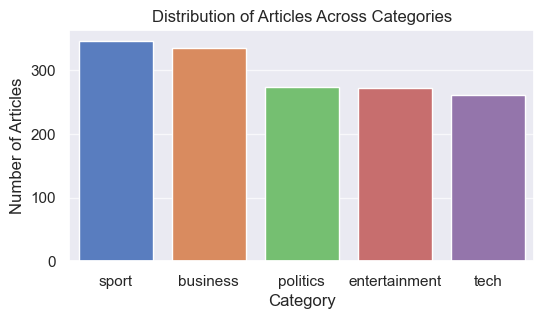

In [95]:
# Display the distribution of articles across different categories
def plot_category_distribution(df):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
    plt.title('Distribution of Articles Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Articles')
    plt.show()

plot_category_distribution(bbc_train_cleaned)

This bar plot showing the distribution of articles across different categories in the training dataset. It helps us understand the class distribution and whether the dataset is balanced.

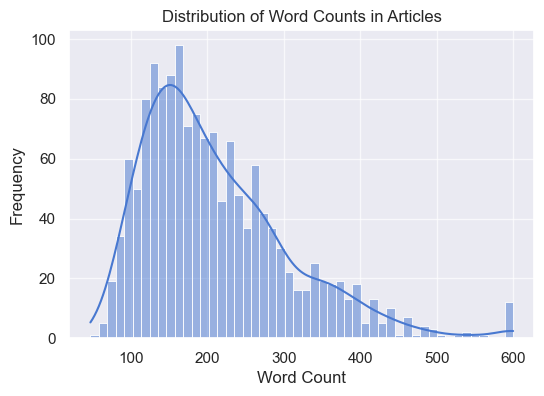

In [96]:
# Function to visualize the distribution of word counts in the articles
def plot_word_count_distribution(df):
    word_counts = df['Text'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(6, 4))
    sns.histplot(word_counts, bins=50, kde=True)
    plt.title('Distribution of Word Counts in Articles')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

plot_word_count_distribution(bbc_train_cleaned)

The histogram shows the distribution of word counts in the articles. It helps us understand the length of the articles and identify any outliers or patterns in article lengths.

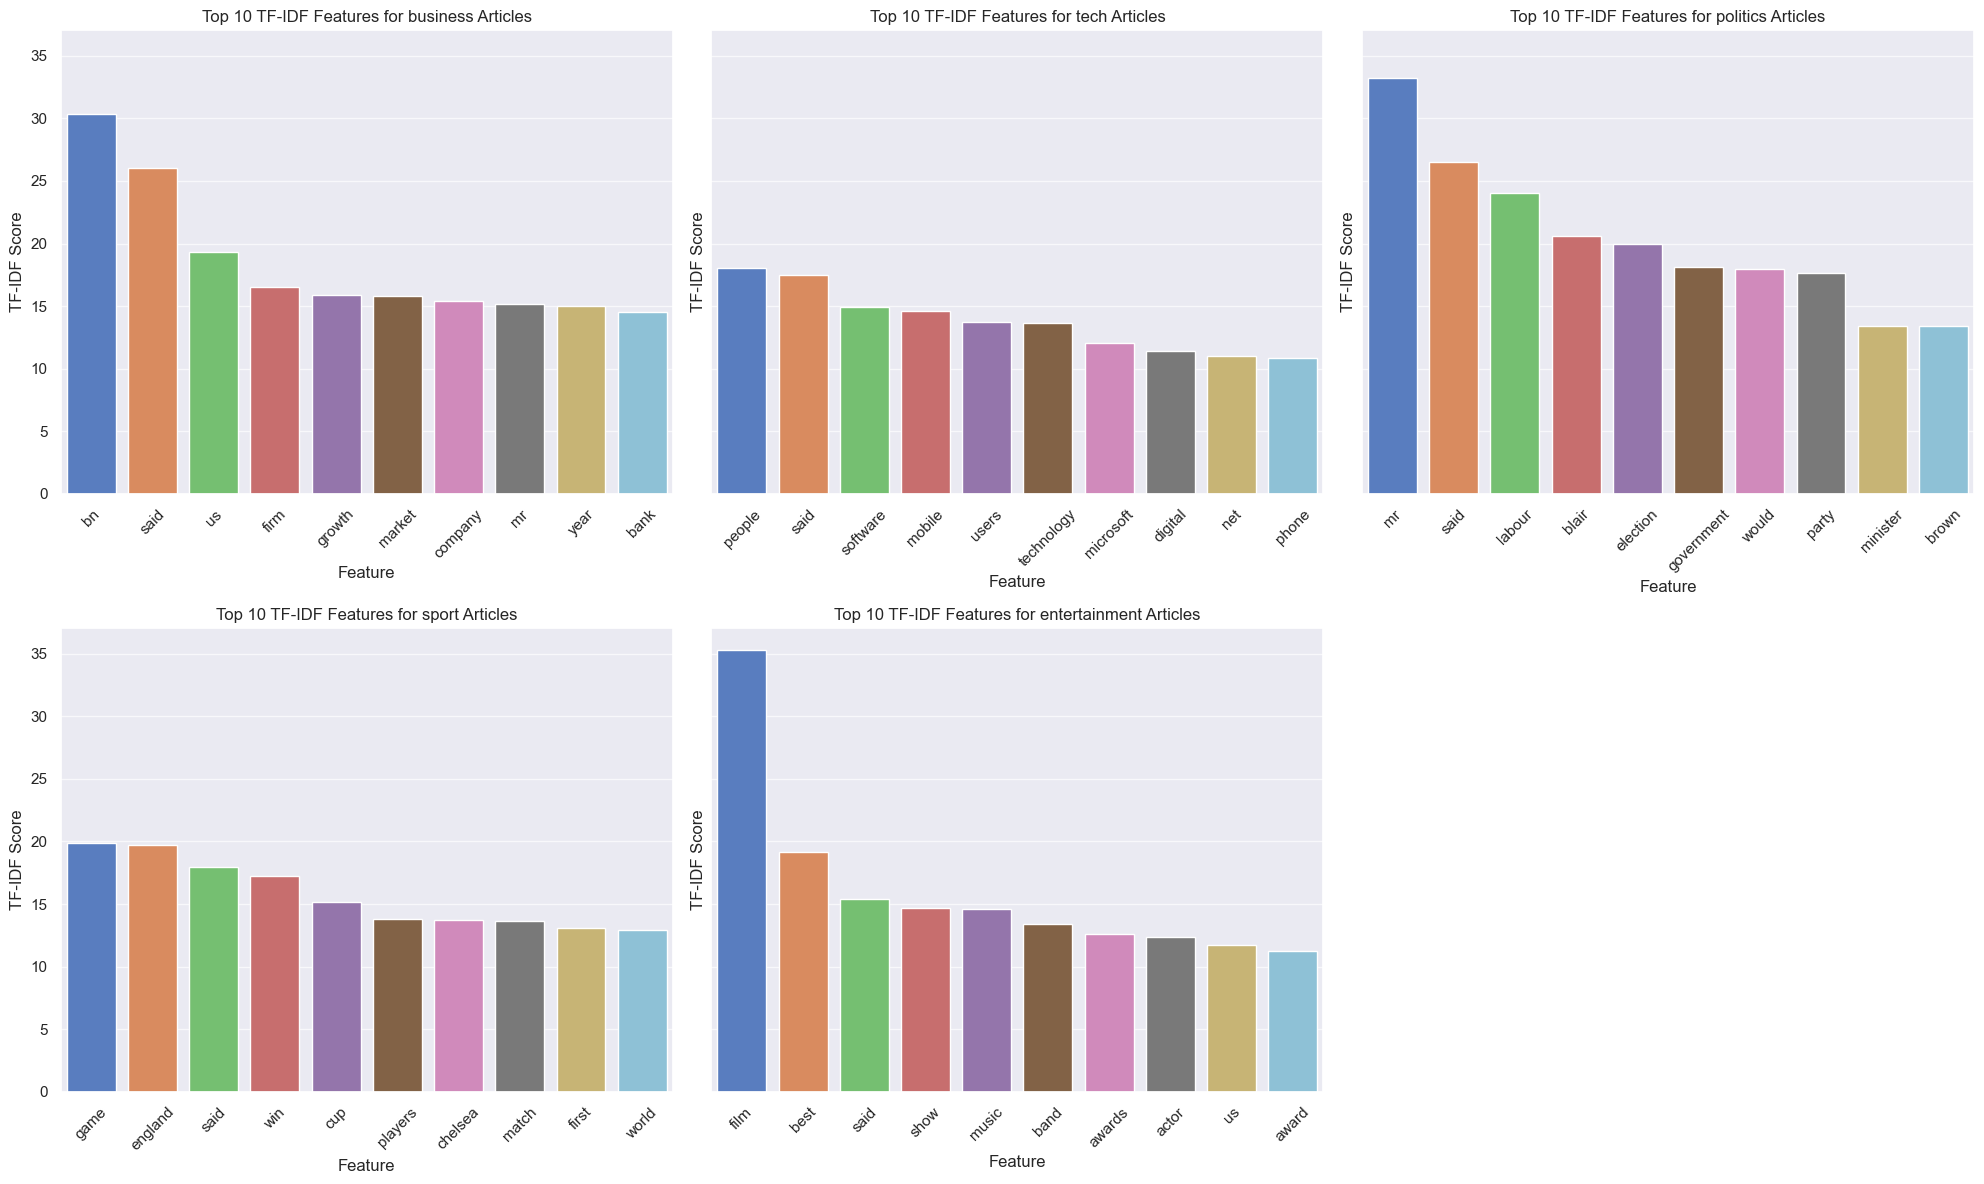

In [97]:
# Function to identify and visualize the top n TF-IDF features for each category
def plot_top_tfidf_features(df, vectorizer, n=10):
    categories = df['Category'].unique()
    num_categories = len(categories)
    
    # Calculate the number of rows and columns
    num_cols = 3
    num_rows = (num_categories + num_cols - 1) // num_cols
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12), sharey=True)
    
    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        
        subset = df[df['Category'] == category]
        X = vectorizer.transform(subset['Text'])
        feature_array = np.array(vectorizer.get_feature_names_out())
        tfidf_sorting = np.argsort(X.toarray().sum(axis=0))[::-1]
        top_n = feature_array[tfidf_sorting][:n]
        
        sns.barplot(x=top_n, y=X.toarray().sum(axis=0)[tfidf_sorting][:n], ax=axes[row, col])
        axes[row, col].set_title(f'Top {n} TF-IDF Features for {category} Articles')
        axes[row, col].set_xlabel('Feature')
        axes[row, col].set_ylabel('TF-IDF Score')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    # Remove empty subplots
    if num_categories < num_rows * num_cols:
        for j in range(num_categories, num_rows * num_cols):
            fig.delaxes(axes.flat[j])
    
    plt.tight_layout()
    plt.show()

# Apply TF-IDF transformation to the cleaned training data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(bbc_train_cleaned['Text'])

# Plot the top 10 TF-IDF features for each category
plot_top_tfidf_features(bbc_train_cleaned, tfidf_vectorizer)

This visualizes the top TF-IDF features for each category in the training dataset. It helps us understand which terms are most significant in distinguishing each category.

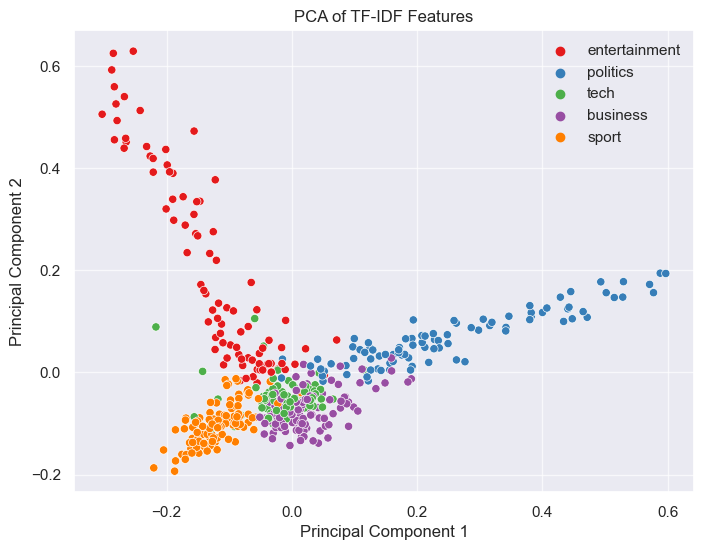

In [98]:
# Function to preprocess the text data using TF-IDF and apply PCA
def apply_pca_and_plot(df, sample_fraction=0.33):
    # Sample a fraction of the dataset
    sampled_df = df.sample(frac=sample_fraction, random_state=42)
    
    # Apply TF-IDF transformation
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X_tfidf = tfidf_vectorizer.fit_transform(sampled_df['Text'])
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_tfidf.toarray())
    
    # Plot the PCA results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=sampled_df['Category'], palette='Set1', legend='full')
    plt.title('PCA of TF-IDF Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.show()

# Apply PCA and plot the results
apply_pca_and_plot(bbc_train_cleaned)

The PCA visualization of the TF-IDF features clearly shows distinct clustering of the various categories. Each point in the scatter plot represents an article, with colors indicating the different categories (business, entertainment, politics, sport, and tech). The clusters are well-defined, suggesting that PCA effectively reduces the high-dimensional TF-IDF features into two dimensions while preserving the separability of the categories. This indicates that the TF-IDF features capture meaningful information about the article categories, making them suitable for classification tasks.

## 5. Modeling <a class="anchor" id="5"></a>
### 5.1 Modeling Strategy <a class="anchor" id="5.1"></a>

To accurately classify BBC news articles into five categories (business, entertainment, politics, sport, and tech), we will develop and evaluate multiple classification models using various matrix factorization techniques. Our approach involves three key steps: pipeline construction, parameter tuning, and performance evaluation. First, we will preprocess the text data by converting it into TF-IDF features using **TfidfVectorizer**. We will then apply three different matrix factorization techniques: Singular Value Decomposition (SVD), Non-Negative Matrix Factorization (NMF), and Latent Semantic Analysis (LSA) via SVD, to reduce the dimensionality of the TF-IDF matrix and capture latent semantic structures. For each technique, we will construct a pipeline that includes TF-IDF transformation, the respective matrix factorization method, and a **LogisticRegression** classifier. Using **GridSearchCV**, we will tune the hyperparameters to find the optimal number of components for each matrix factorization method and the best regularization parameter for the logistic regression model. We will evaluate the models using cross-validation accuracy on the training set and select the best model based on this metric. Finally, the selected models will be evaluated on the test set to determine their final accuracy. This comprehensive strategy ensures that each model is developed and tuned for optimal performance, allowing us to identify the best matrix factorization technique for classifying BBC news articles.

### 5.2 Modeling <a class="anchor" id="5.2"></a> 

#### 5.2.1 Singular Value Decomposition (SVD) <a class="anchor" id="5.2.1"></a>

In [99]:
# Define the SVD and Logistic Regression pipeline
svd_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
svd_param_grid = {
    'svd__n_components': [50, 100, 200],
    'clf__C': [0.1, 1, 10]
}

# Perform GridSearchCV for SVD
svd_grid_search = GridSearchCV(svd_pipeline, svd_param_grid, cv=5, scoring='accuracy')
svd_grid_search.fit(bbc_train_cleaned['Text'], bbc_train_cleaned['Category'])

# Get the best model and its performance
best_svd_model = svd_grid_search.best_estimator_
svd_best_score = svd_grid_search.best_score_

print(f"Best SVD Model: {best_svd_model}")
print(f"Best SVD Model Accuracy: {svd_best_score}")

Best SVD Model: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('svd', TruncatedSVD(n_components=200)),
                ('clf', LogisticRegression(C=1))])
Best SVD Model Accuracy: 0.9657718120805369


#### 5.2.2 Non-Negative Matrix Factorization (NMF) <a class="anchor" id="5.2.2"></a>

In [100]:
# Define the NMF and Logistic Regression pipeline
nmf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('nmf', NMF(n_components=100, random_state=42)),
    ('clf', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
nmf_param_grid = {
    'nmf__n_components': [50, 100, 200],
    'clf__C': [0.1, 1, 10]
}

# Perform GridSearchCV for NMF
nmf_grid_search = GridSearchCV(nmf_pipeline, nmf_param_grid, cv=5, scoring='accuracy')
nmf_grid_search.fit(bbc_train_cleaned['Text'], bbc_train_cleaned['Category'])

# Get the best model and its performance
best_nmf_model = nmf_grid_search.best_estimator_
nmf_best_score = nmf_grid_search.best_score_

print(f"Best NMF Model: {best_nmf_model}")
print(f"Best NMF Model Accuracy: {nmf_best_score}")

Best NMF Model: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('nmf', NMF(n_components=50, random_state=42)),
                ('clf', LogisticRegression(C=10))])
Best NMF Model Accuracy: 0.9281879194630871


#### 5.2.3 Latent Semantic Analysis (LSA) <a class="anchor" id="5.2.3"></a>

In [101]:
# Define the LSA and Logistic Regression pipeline
lsa_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', LogisticRegression())
])

# Perform GridSearchCV for LSA (similar to SVD pipeline as LSA uses SVD)
lsa_param_grid = {
    'svd__n_components': [50, 100, 200],
    'clf__C': [0.1, 1, 10]
}

# Perform GridSearchCV for LSA
lsa_grid_search = GridSearchCV(lsa_pipeline, lsa_param_grid, cv=5, scoring='accuracy')
lsa_grid_search.fit(bbc_train_cleaned['Text'], bbc_train_cleaned['Category'])

# Get the best model and its performance
best_lsa_model = lsa_grid_search.best_estimator_
lsa_best_score = lsa_grid_search.best_score_

print(f"Best LSA Model: {best_lsa_model}")
print(f"Best LSA Model Accuracy: {lsa_best_score}")

Best LSA Model: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('svd', TruncatedSVD(n_components=50)),
                ('clf', LogisticRegression(C=10))])
Best LSA Model Accuracy: 0.965771812080537


### 5.3 Modeling, Evaluation and Comparison <a class="anchor" id="5.3"></a> 
#### 5.3.1 Best Model <a class="anchor" id="5.3.1"></a>

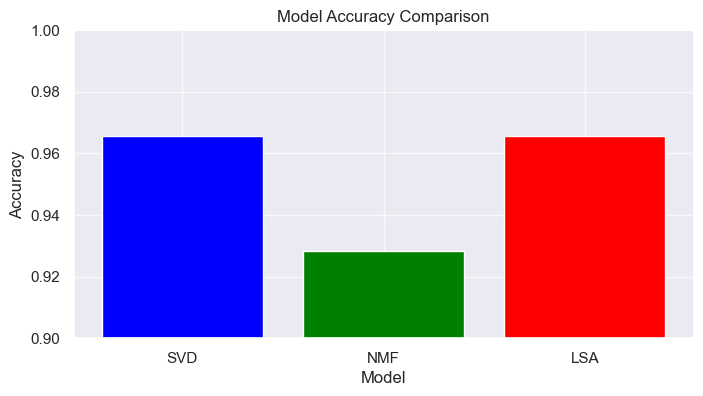

In [103]:
# Accuracy values
models = ['SVD', 'NMF', 'LSA']
accuracies = [0.9657718120805369, 0.9281879194630871, 0.965771812080537]

# Plotting the accuracy
plt.figure(figsize=(8, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison')
plt.show()

Based on the accuracy results, the SVD and LSA models both achieved the highest accuracy of 0.9658. The NMF model had a slightly lower accuracy of 0.9282. Given the identical accuracy of the SVD and LSA models, either could be selected as the best-performing model. However, since SVD with more components (200) provided a more detailed representation, it is chosen for further analysis.

**Best SVD Model Parameters:**
* TF-IDF Vectorizer: max_features=1000, stop_words='english'
* TruncatedSVD: n_components=200
* Logistic Regression: C=1

#### 5.3.2 Sample Solution DataFrame <a class="anchor" id="5.3.2"></a>

In [111]:
# Predict the categories for the test dataset using the best SVD model
svd_test_predictions = best_svd_model.predict(bbc_test_cleaned['Text'])

# Create the sample solution DataFrame
sample_solution = pd.DataFrame({
    'ArticleId': bbc_test_cleaned['ArticleId'],
    'Category': svd_test_predictions
})

# Save the sample solution file as CSV
sample_solution_file_path = 'bbc_news_sample_solution.csv'
sample_solution.to_csv(sample_solution_file_path, index=False)

print(f"Sample solution file generated: {sample_solution_file_path}")

Sample solution file generated: bbc_news_sample_solution.csv


In [112]:
sample_solution.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport


#### 5.3.3 Comparision of Best Model with Random Forest Classifier (Supervised Model)  <a class="anchor" id="5.3.3"></a>

Since the test dataset doesn't have the Category column, we won't be able to directly compare the accuracy using the test dataset's true labels. However, we can still train and evaluate the Random Forest model using **cross-validation** on the training set and compare it with the SVD model trained earlier.

In [118]:
# Cross-validation for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
rf_cv_accuracy = np.mean(rf_cv_scores)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_accuracy}")

Random Forest Cross-Validation Accuracy: 0.9510067114093959


In [119]:
svd_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
    ('svd', TruncatedSVD(n_components=200)),
    ('clf', LogisticRegression(C=1))
])

svd_cv_scores = cross_val_score(svd_pipeline, bbc_train_cleaned['Text'], y_train, cv=5, scoring='accuracy')
svd_cv_accuracy = np.mean(svd_cv_scores)
print(f"SVD Cross-Validation Accuracy: {svd_cv_accuracy}")

SVD Cross-Validation Accuracy: 0.9651006711409396


The SVD model outperformed the Random Forest model, achieving a higher cross-validation accuracy of 0.9651 compared to the Random Forest model's accuracy of 0.9510. This marginally better performance of the SVD model can be attributed to several factors:

**Dimensionality Reduction:** SVD effectively reduces the dimensionality of the TF-IDF features, capturing the most significant underlying patterns and removing noise. This can help the model generalize better and improve its classification accuracy.

**Latent Semantic Structures:** SVD captures latent semantic structures in the text data, which can reveal relationships between terms that are not immediately apparent in the high-dimensional TF-IDF space. This can enhance the model's ability to distinguish between different categories.

**Regularization in Logistic Regression:** The SVD model uses Logistic Regression with a regularization parameter (C=1), which helps prevent overfitting by penalizing large coefficients. This can lead to a more robust model that performs better on unseen data.

**Complexity of Random Forest:** While Random Forests are powerful and flexible, they can sometimes be less effective with high-dimensional sparse data like TF-IDF features. The ensemble nature of Random Forests can lead to models that capture too much noise, especially when dealing with thousands of features.